- `make_classification` 함수<br><br>
  - 설정에 따른 분류용 가상 데이터를 생성하는 명령<br><br>
- 인수
  - `n_samples` : 표본 데이터의 수, 디폴트 100<br><br>
  - `n_features` : 독립 변수의 수, 디폴트 20<br><br>
  - `n_informative` : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2<br><br>
  - `n_redundant` : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2<br><br>
  - `n_repeated` : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0<br><br>
  - `n_classes` : 종속 변수의 클래스 수, 디폴트 2<br><br>
  - `n_clusters_per_class` : 클래스 당 클러스터의 수, 디폴트 2<br><br>
  - `weights` : 각 클래스에 할당된 표본 수<br><br>
  - `random_state` : 난수 발생 시드<br><br>
- 반환값<br><br>
  - `X` : `[n_samples, n_features]` 크기의 배열. 독립 변수<br><br>
  - `y` : `[n_samples]` 크기의 배열. 종속 변수<br><br>

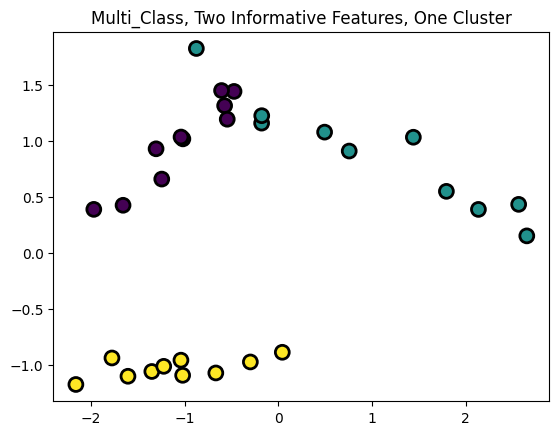

In [86]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

plt.title('Multi_Class, Two Informative Features, One Cluster')

X, y = make_classification(
  n_samples=30,
  n_features=2,
  n_informative=2,
  n_redundant=0,
  n_clusters_per_class=1,
  n_classes=3, 
  random_state=42
)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolors='k', linewidths=2)

plt.show()

In [87]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, init='random') # 모형 생성
model.fit(X)

model.cluster_centers_ # 각 클러스터의 중심 값

array([[-1.11015163, -1.02464833],
       [ 1.89122156,  0.5775844 ],
       [-0.79784746,  1.0808292 ]])

In [88]:
pred = model.predict(X)
pred

array([0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 1])

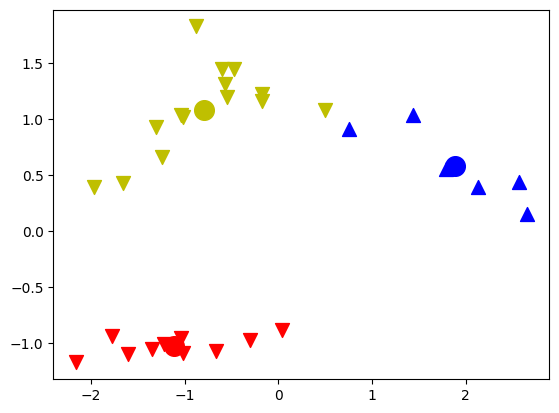

In [89]:
c0, c1, c2 = model.cluster_centers_ # 각 클러스터의 중심 값(평균 값?) / 클러스터 수만큼 구해짐

# 첫 번째 클러스터 데이터를 이용한 산점도
plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], s=100, marker='v', c='r')

# 두 번째 클러스터 데이터를 이용한 산점도
plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], s=100, marker='^', c='b')

# 세 번째 클러스터 데이터를 이용한 산점도
plt.scatter(X[model.labels_ == 2, 0], X[model.labels_ == 2, 1], s=100, marker='v', c='y')

# 첫 번째 클러스터의 중심 값
plt.scatter(c0[0], c0[1], s=200, c='r')

# 두 번째 클러스터의 중심 값
plt.scatter(c1[0], c1[1], s=200, c='b')

# 세 번째 클러스터의 중심 값
plt.scatter(c2[0], c2[1], s=200, c='y')

plt.show()

In [90]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.hstack(
  [X,
  np.linalg.norm(X - c0, axis=1)[:, np.newaxis], # 첫 번째 클러스터 중심 값과의 거리
  np.linalg.norm(X - c1, axis=1)[:, np.newaxis], # 두 번째 클러스터 중심 값과의 거리
  np.linalg.norm(X - c2, axis=1)[:, np.newaxis], # 세 번째 클러스터 중심 값과의 거리
  model.labels_[:, np.newaxis]]
), columns=['x0', 'x1', 'd0', 'd1', 'd2', 'class'])

df

,x0,x1,d0,d1,d2,class
0,-1.021574,-1.090550,0.110404,3.356643,2.182874,0.0
1,-2.161261,-1.172267,1.061425,4.414136,2.633503,0.0
2,0.756774,0.908973,2.687807,1.181859,1.564092,1.0
3,-1.350538,-1.056421,0.242477,3.630286,2.207556,0.0
4,0.042431,-0.885203,1.160988,2.357493,2.138071,0.0
5,-1.019000,1.017453,2.044135,2.943276,0.230055,2.0
6,2.565832,0.433614,3.954666,0.689802,3.425379,1.0
7,-0.298541,-0.971508,0.813348,2.682303,2.112201,0.0
8,2.652689,0.152615,3.942704,0.872027,3.573204,1.0
9,1.794266,0.549647,3.303642,0.100900,2.645979,1.0


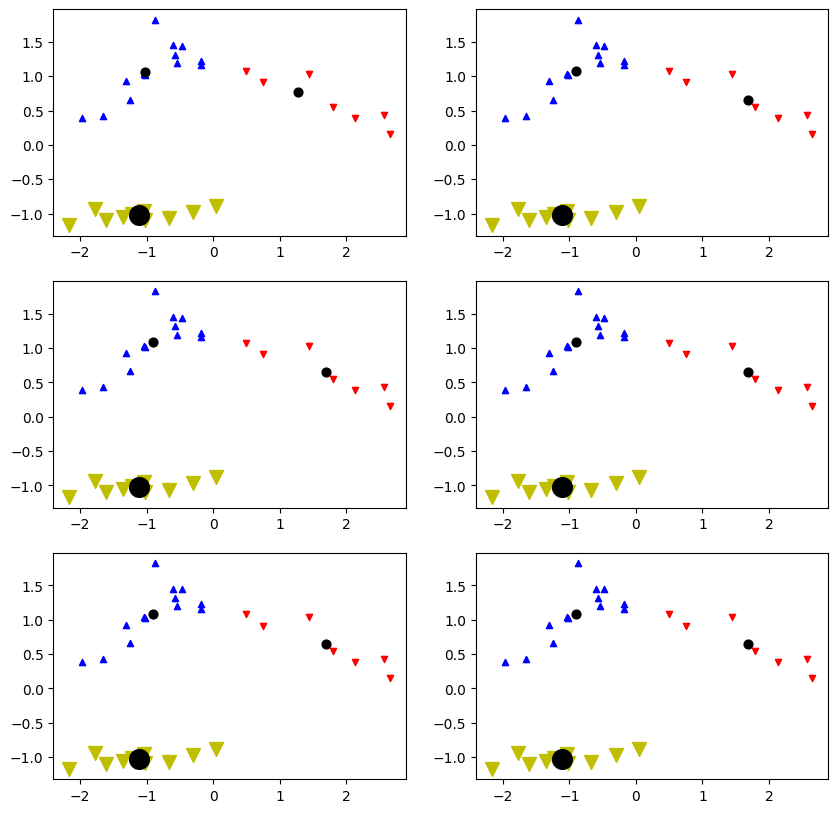

In [91]:
# 모델과 데이터를 인수로 받아 산점도와 중심점을 출력할 함수
def plot_clusters(model, data):
  c0, c1, c2 = model.cluster_centers_

  plt.scatter(
    data[model.labels_ == 0, 0],
    X[model.labels_ == 0, 1],
    s=20,
    marker='v',
    c='r'
  )

  plt.scatter(
    data[model.labels_ == 1, 0],
    X[model.labels_ == 1, 1],
    s=20,
    marker='^',
    c='b'
  )

  plt.scatter(
    X[model.labels_ == 2, 0],
    X[model.labels_ == 2, 1],
    s=100,
    marker='v',
    c='y'
  )

  plt.scatter(c0[0], c0[1], s=40, c='k')
  plt.scatter(c1[0], c1[1], s=40, c='k')
  plt.scatter(c2[0], c2[1], s=200, c='k')

# KMeans 클래스의 max_iter 인자는 최대 학습 횟수를 지정
plt.figure(figsize=(10, 10))

model1 = KMeans(
  n_clusters=3,
  init='random',
  n_init=1,
  max_iter=1, # 총 반복 횟수 지정
  random_state=1
)
model1.fit(X)
plt.subplot(3, 2, 1)
plot_clusters(model1, X)
# ----------------------------------
model2 = KMeans(
  n_clusters=3,
  init='random',
  n_init=1,
  max_iter=2,
  random_state=1
)
model2.fit(X)
plt.subplot(3, 2, 2)
plot_clusters(model2, X)
# ----------------------------------
model3 = KMeans(
  n_clusters=3,
  init='random',
  n_init=1,
  max_iter=3,
  random_state=1
)
model3.fit(X)
plt.subplot(3, 2, 3)
plot_clusters(model3, X)
# ----------------------------------
model4 = KMeans(
  n_clusters=3,
  init='random',
  n_init=1,
  max_iter=4,
  random_state=1
)
model4.fit(X)
plt.subplot(3, 2, 4)
plot_clusters(model4, X)
# ----------------------------------
model5 = KMeans(
  n_clusters=3,
  init='random',
  n_init=1,
  max_iter=5,
  random_state=1
)
model5.fit(X)
plt.subplot(3, 2, 5)
plot_clusters(model5, X)
# ----------------------------------
model6 = KMeans(
  n_clusters=3,
  init='random',
  n_init=1,
  max_iter=6,
  random_state=1
)
model6.fit(X)
plt.subplot(3, 2, 6)
plot_clusters(model6, X)

plt.show()

In [92]:
import numpy as np

X = np.random.randint(
  low=1,
  high=10,
  size=(3, 3)
)
print(X)
print('--------------------')

L1_norm = np.linalg.norm(X, axis=1, ord=1) # ord=1 : L1 norm
print(L1_norm)
print('shape :', L1_norm.shape)
print('--------------------')

L2_norm = np.linalg.norm(X, axis=1, ord=2) # ord=2 : L2 norm (default)
print(L2_norm)
print('shape :', L2_norm.shape)
print('--------------------')

[[4 6 7]
 [9 7 4]
 [1 5 7]]
--------------------
[17. 20. 13.]
shape : (3,)
--------------------
[10.04987562 12.08304597  8.66025404]
shape : (3,)
--------------------


# Iris Data를 사용한 K-means Clustering 만들기

In [93]:
import math
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_data_pd = pd.DataFrame(iris_data, columns=iris.feature_names)
iris_data_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


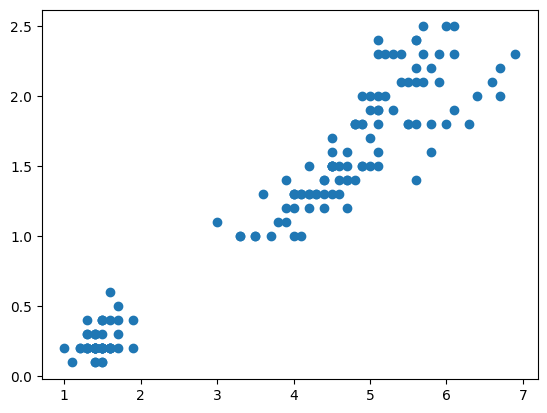

In [94]:
# 'petal length' 와 'petal width' 데이터 2개의 상관 관계
import matplotlib.pyplot as plt

petals = pd.DataFrame(
  iris_data_pd.values[:, 2:4],
  columns=['petal length (cm)', 'petal width (cm)']
)

plt.scatter(petals.values[:, 0], petals.values[:, 1])

plt.show()

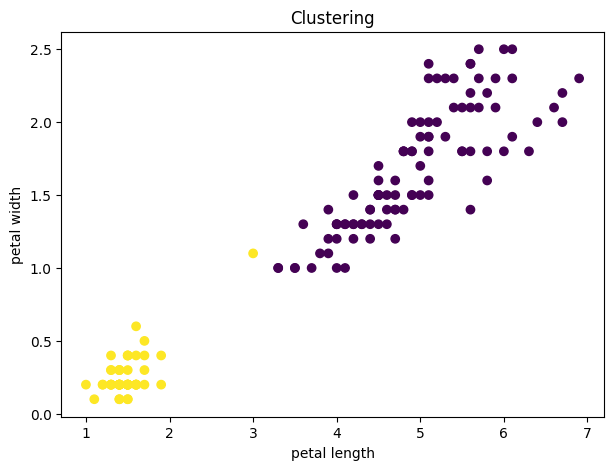

petal length (cm)    3.0
petal width (cm)     1.1
Name: 98, dtype: float64


array([[4.92525253, 1.68181818],
       [1.49215686, 0.2627451 ]])

In [95]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=50)
km.fit(iris_data_pd.iloc[:, 2:4])

y_pred = km.predict(iris_data_pd.iloc[:, 2:4])

plt.figure(figsize=(7, 5))

plt.scatter(
  iris_data_pd.iloc[:, 2],
  iris_data_pd.iloc[:, 3],
  c=y_pred
)

plt.title('Clustering')

plt.xlabel('petal length')
plt.ylabel('petal width')

plt.show()

km.predict(iris_data_pd.iloc[:, 2:4])

print(iris_data_pd.iloc[98, 2:4])

# 각 클러스터 기준 값 확인
km.cluster_centers_

In [96]:
km.predict(iris_data_pd.iloc[:, 2:4])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [97]:
# 유클리드 거리 측정
def distance(x1, y1, x2, y2):
  dx = x2 - x1
  dy = y2 - y1

  squared = dx**2 + dy**2

  result = math.sqrt(squared)

  return result
  # L2 norm 계산 과정

print(
  '0 Cluster Distance :',
  distance(
    iris_data_pd.iloc[98, 2],
    iris_data_pd.iloc[98, 3],
    km.cluster_centers_[0][0],
    km.cluster_centers_[0][1]
  )
)

print(
  '1 Cluster Distance :',
  distance(
    iris_data_pd.iloc[98, 2],
    iris_data_pd.iloc[98, 3],
    km.cluster_centers_[1][0],
    km.cluster_centers_[1][1]
  )
)

0 Cluster Distance : 2.0112458036464465
1 Cluster Distance : 1.7246990164733285
